In [1]:
%matplotlib qt5
import shapefile
import geotable
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import numpy as np

In [2]:
#path of the file
bou_gra = "Gravity/WA/Bouguer_anomaly_grid/WA_400m_Grav_Merge_v1_2020.ers"
#open data
ds = gdal.Open(bou_gra)
#transform data
gt = ds.GetGeoTransform()

In [3]:
#x,y in the upper left corner, with 
#The grid cell size is 0.00416666 degrees (approx 400 metres).WA_400m_Grav_Merge_v1_2020.ers
gt

(111.99791667, 0.00416666, 0.0, -11.877916670000001, 0.0, -0.00416666)

In [4]:
xmin = list(gt)[0]
ymax = list(gt)[3]
res = list(gt)[1]

In [5]:
proj = ds.GetProjection()

In [6]:
proj

'GEOGCS["GEOCENTRIC DATUM of AUSTRALIA",DATUM["GDA94",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'

In [7]:
#get the band data
#You can also check the number of bands in the file
#ds.RasterCount
band = ds.GetRasterBand(1)
#convert band data to arrat
arr = band.ReadAsArray()

In [8]:
#The -99999. means there is no data
arr[arr==-99999.]=np.nan

In [19]:
arr

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,  458.19733,  454.00494, ...,        nan,        nan,
               nan],
       [       nan,  458.3138 ,  454.0777 , ...,        nan,        nan,
               nan],
       ...,
       [       nan, -454.14127, -456.52332, ...,        nan,        nan,
               nan],
       [       nan, -459.60995, -461.9878 , ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

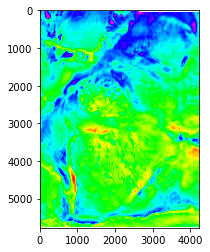

In [9]:
#notice here the x,y are not coords
#need to convert it to coords
plt.figure()
plt.imshow(arr, cmap=plt.cm.hsv)

In [10]:
xval =[xmin+i*res for i in range(arr.shape[1])]
yval =[ymax-i*res for i in range(arr.shape[0])]

In [11]:
arr.shape

(5775, 4225)

In [12]:
gravity = []
x_coord = []
y_coord = []
for i in range(len(yval)):
    for j in range(len(xval)):
        data = arr[i][j]
        y_data = yval[i]
        x_data = xval[j]
        gravity.append(data)
        x_coord.append(x_data)
        y_coord.append(y_data)

In [13]:
np.count_nonzero(np.isnan(gravity))

102857

In [14]:
d = {'x_data':x_coord, 'y_data': y_coord, 'gravity':gravity}
df = pd.DataFrame(data=d)

In [15]:
df_data = df.dropna()

In [16]:
df_data.shape

(24296518, 3)

In [17]:
df_data

,x_data,y_data,gravity
4226,112.002083,-11.882083,458.197327
4227,112.006250,-11.882083,454.004944
4228,112.010417,-11.882083,449.993805
4229,112.014583,-11.882083,445.973114
4230,112.018750,-11.882083,441.708771
...,...,...,...
24391717,115.297911,-35.932045,-921.773315
24391718,115.302078,-35.932045,-911.960754
24391719,115.306245,-35.932045,-901.877625
24391720,115.310411,-35.932045,-891.594666


In [32]:
df_select = df_data[((df_data["x_data"]>115.5) & (df_data["x_data"]<116.5) & (df_data["y_data"]>-31) & (df_data["y_data"]<-30))]

In [34]:
df_select

,x_data,y_data,gravity
18379591,115.502078,-30.002888,-1198.438477
18379592,115.506244,-30.002888,-1203.108154
18379593,115.510411,-30.002888,-1207.593872
18379594,115.514578,-30.002888,-1211.891235
18379595,115.518744,-30.002888,-1216.001221
...,...,...,...
19389601,116.481243,-30.998719,-190.192719
19389602,116.485409,-30.998719,-193.561462
19389603,116.489576,-30.998719,-197.488464
19389604,116.493743,-30.998719,-202.142776


In [35]:
df_select.to_csv("WA_gravity.csv", header=True, index=False)

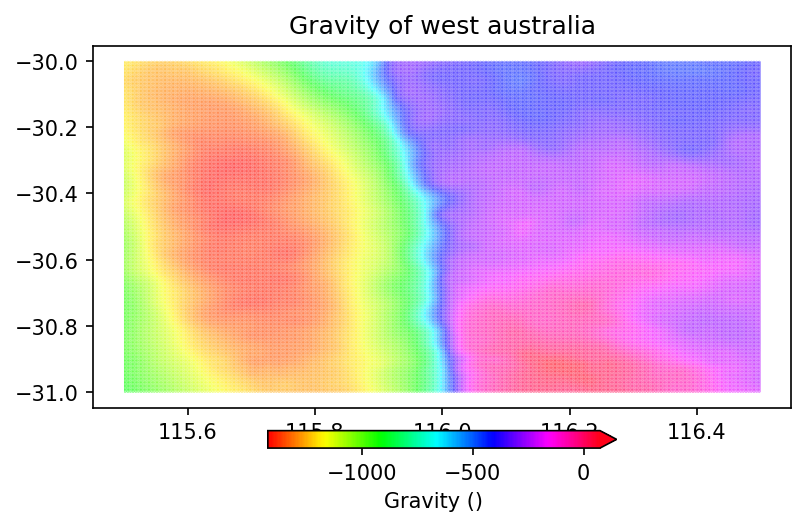

CPU times: user 946 ms, sys: 39 ms, total: 985 ms
Wall time: 634 ms


In [36]:
%%time
#x,y converted to coords
#Create a figure object
fig = plt.figure(dpi=150)
ax=plt.axes()

#Make a scatter plot of the data coloured by gravity. 
#And also set the scatter plot as a variable 'mapscat' so we can reference it later
mapscat=ax.scatter(df_select["x_data"],df_select["y_data"],marker=".",s=0.1,c=df_select["gravity"],cmap=plt.cm.hsv)

#Make a Colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Gravity ()')

# Add a map title, and tell the figure to appear on screen
plt.title('Gravity of west australia')
plt.show()